# Exersice 1
Используйте различные оптимизаторы, сравните результаты, ответ в виде диаграмма со столбцами

In [1]:
#import necessary libraries
import tensorflow as tf

#load training data and split into train and test sets
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

2024-05-17 07:06:04.851369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 07:06:05.409728: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def build_and_test(optimizer):
    #define model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10)
    ])

    #define loss function variable
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    #define optimizer,loss function and evaluation metric
    model.compile(optimizer=optimizer,
                  loss=loss_fn,
                  metrics=['accuracy'])

    #train the model
    history = model.fit(x_train, y_train, epochs=5)
    return history

In [3]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [4]:
optimizers_history = list(zip(optimizers, list(map(lambda o: build_and_test(o).history, optimizers))))

/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-17 07:06:06.052511: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-17 07:06:06.069206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sys

Epoch 1/5


I0000 00:00:1715918766.697107   32029 service.cc:145] XLA service 0x76754c0084a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715918766.697126   32029 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-05-17 07:06:06.707367: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 07:06:06.755331: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 286/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.0939 - loss: 2.4213

I0000 00:00:1715918767.715216   32029 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 494us/step - accuracy: 0.1018 - loss: 2.3870
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.1853 - loss: 2.2181
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.2873 - loss: 2.0792
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.3822 - loss: 1.9525
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.4714 - loss: 1.8310
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 543us/step - accuracy: 0.5237 - loss: 1.6294
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.8113 - loss: 0.7519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - accuracy: 0.8421 - loss: 0.5972
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.8596 - loss: 0.5208
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.8680 - loss: 0.4841
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 515us/step - accuracy: 0.8588 - loss: 0.4838
Epoch 2/5
1875/1875 ━━━━━━━━━━━

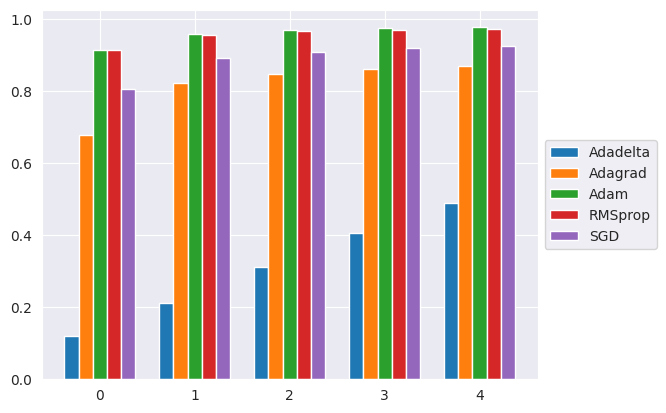

In [7]:
import matplotlib.pyplot as plt

data = list(map(lambda h: (h[0], h[1]['accuracy']), optimizers_history))
bars = []
for i, (label, values) in enumerate(data):
    i = i - 2
    x = list(map(lambda xi: xi + i * 0.15, range(len(values))))
    bar = plt.bar(x, values, width=0.15)
    bars.append(bar)

plt.legend(bars, optimizers, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()